<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
sacramento_housing = pd.read_csv('datasets/sacramento_real_estate_transactions.csv', dtype={'zip': str})
sacramento_housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
sacramento_housing.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [4]:
sacramento_housing.isnull().duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
980     True
981     True
982     True
983     True
984     True
Length: 985, dtype: bool

In [5]:
sacramento_housing.shape

(985, 12)

In [6]:
sacramento_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [7]:
sacramento_housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [8]:
sacramento_housing.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [9]:
sacramento_housing_df = sacramento_housing

In [10]:
sacramento_housing_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


/Users/seydoutoure/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


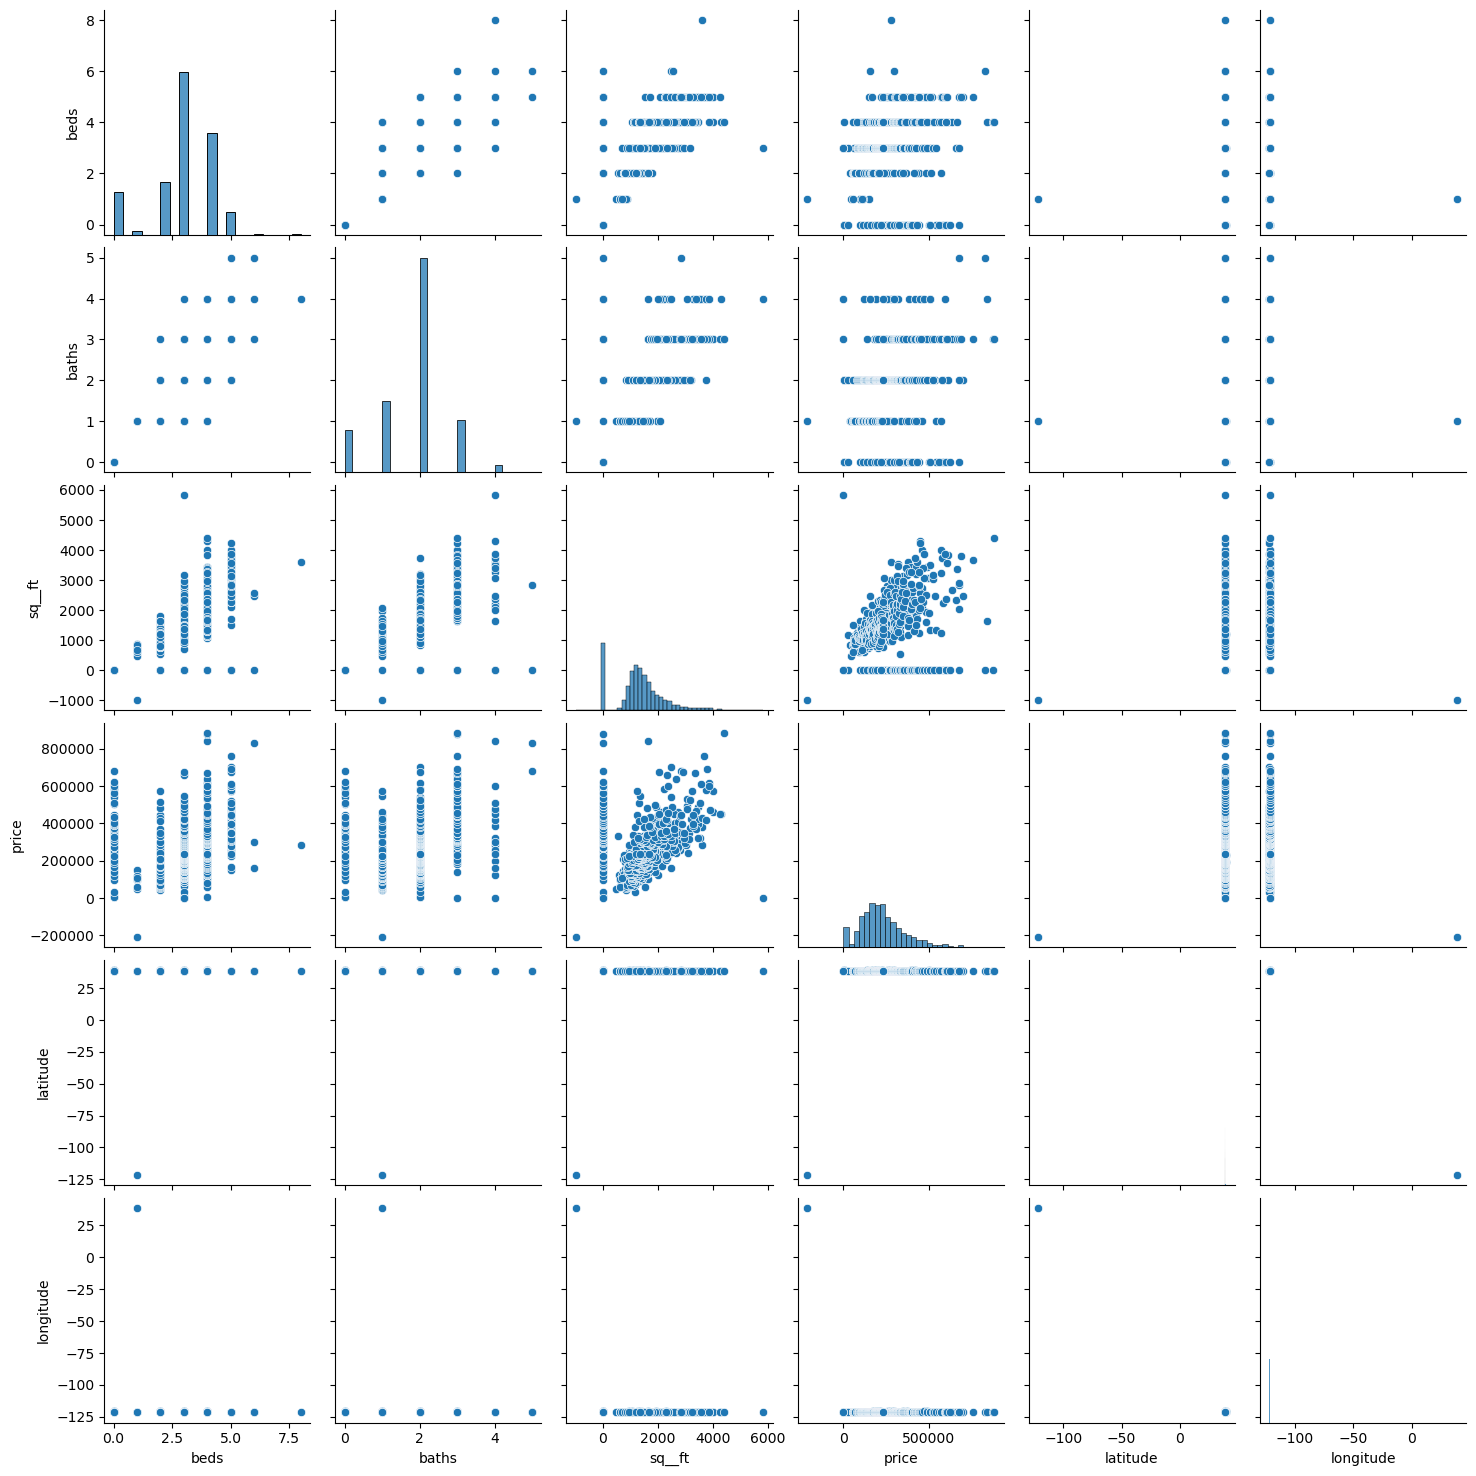

In [11]:
sns.pairplot(sacramento_housing_df);

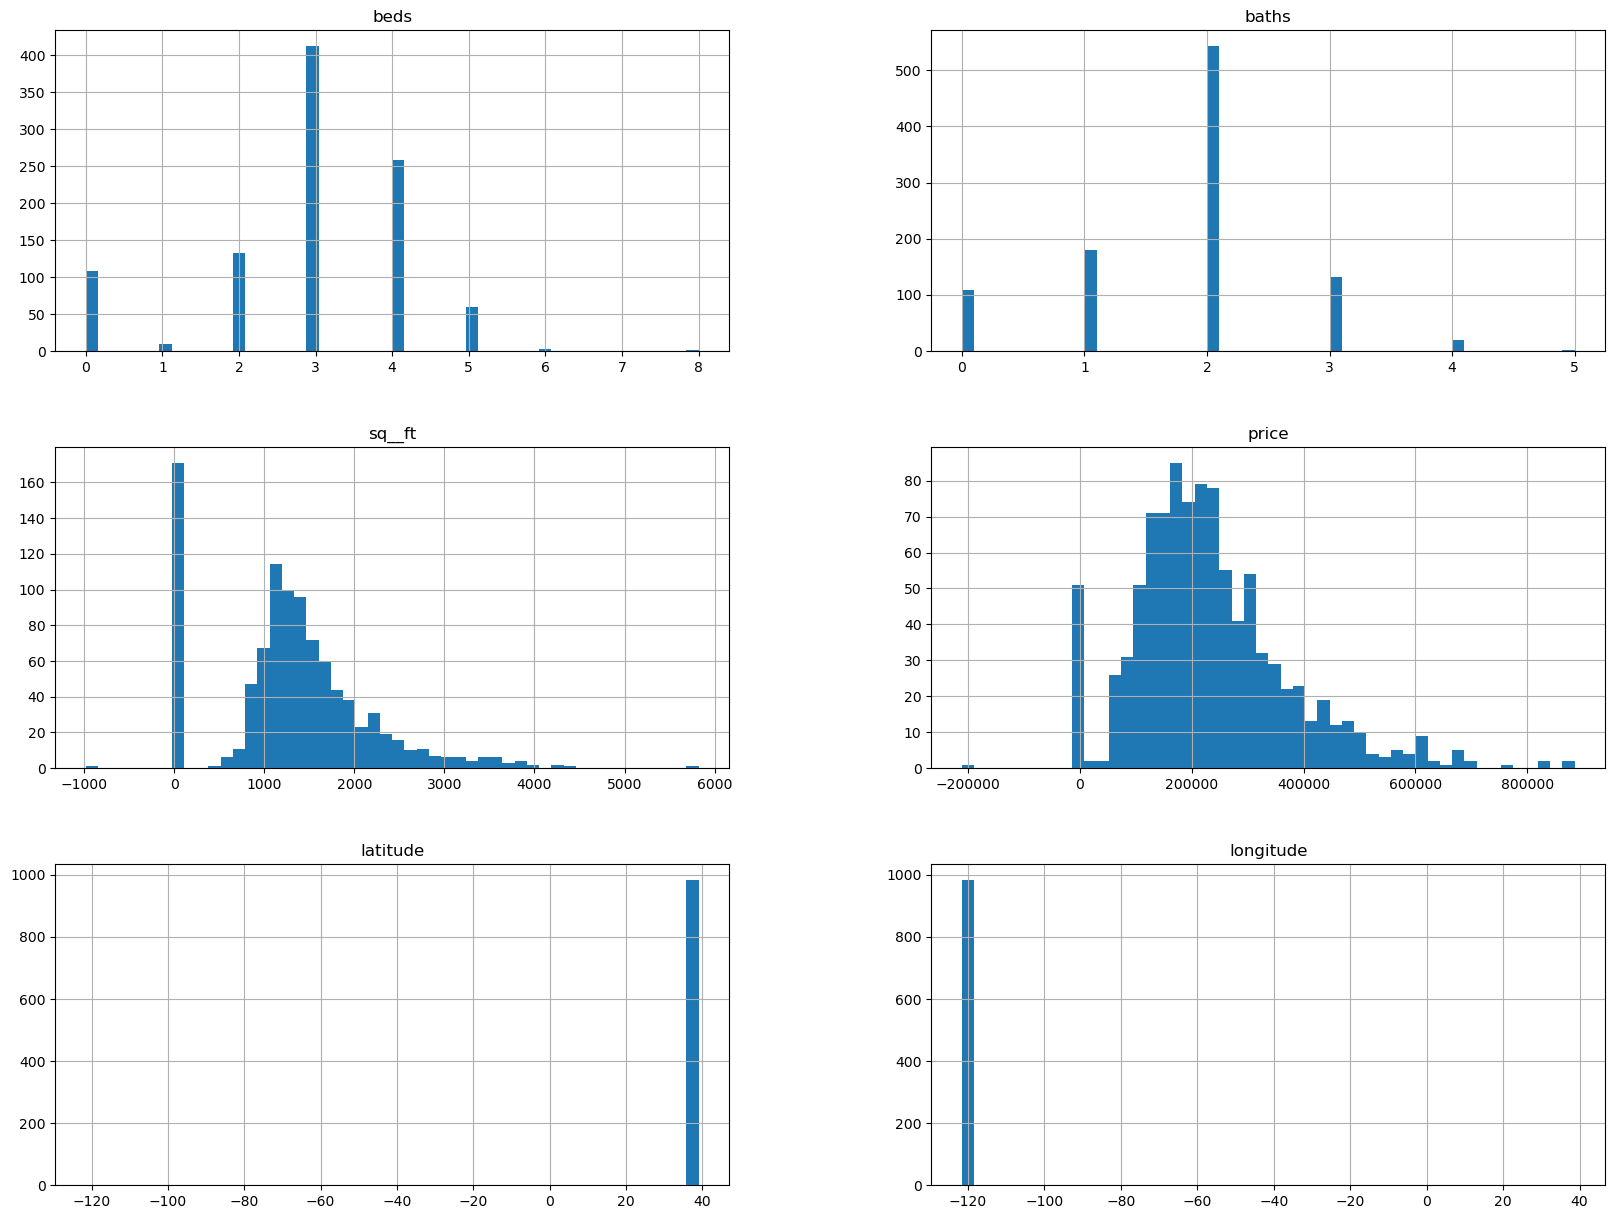

In [12]:
sacramento_housing_df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show() 

In [13]:
sacramento_housing_df.shape

(985, 12)

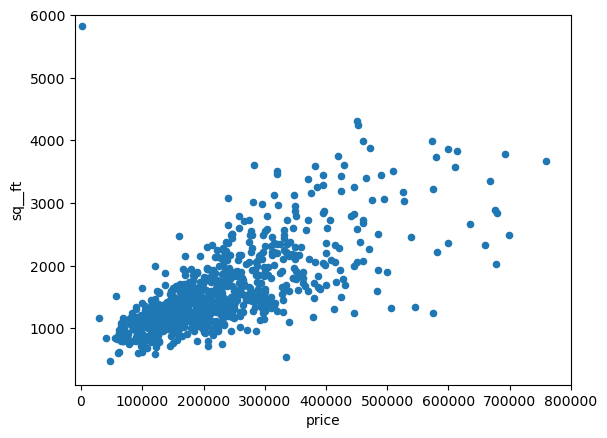

In [14]:
sacramento_housing_df.plot(kind="scatter", x="price", y="sq__ft")
plt.axis([-10000, 800000, 100, 6000])
plt.show()

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

The variable 'price' would be the best predictor for Y in an SLR. Because the target variable is the variable 'price'

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [15]:
from scipy.stats import pearsonr

def linear_regression_coefficients(x, y):
    # Calculate the means of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the standard deviations of x and y
    std_x = np.std(x, ddof=1)  # Using ddof=1 for sample standard deviation
    std_y = np.std(y, ddof=1)

    # Calculate the correlation between x and y
    r_xy, _ = pearsonr(x, y)

    # Calculate the slope (beta1)
    beta1 = r_xy * std_y / std_x

    # Calculate the intercept (beta0)
    beta0 = mean_y - beta1 * mean_x

    return beta0, beta1

# Example usage with hypothetical lists 'price' and 'best_predictor'
# Assuming these are the lists of price and the best predictor variable
price = [100, 200, 300, 400, 500]  # Example data
best_predictor = [10, 20, 30, 40, 50]  # Example data

# Calculate the slope and intercept
intercept, slope = linear_regression_coefficients(best_predictor, price)
intercept, slope


(5.684341886080802e-14, 9.999999999999998)

### 6. Interpret the intercept and the slope.

#### Slope (approximately 10.0):
The slope of the linear model is about 10.0. This indicates that for each unit increase in the predictor variable(intercept), the target variable (slope) increases by approximately **10 units**.
In other words, there is a strong positive linear relationship between the predictor and the target variable. If the predictor goes up by 1, the target goes up by 10.
#### Intercept (approximately 5.684341886080802e-14):
The intercept is extremely close to zero. In practical terms, it can be considered as zero for most purposes.
An intercept close to zero suggests that when the predictor variable is zero, the target variable is also close to zero (or at least starts very close to zero).
The almost-zero intercept in this model implies that the linear relationship between the predictor and the target variable essentially passes through the origin, reinforcing a direct proportionality

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### Example of Prediction Using the Model

**Context**: Suppose we have a dataset from an online bookstore, where the predictor variable is the number of marketing emails sent to customers (x), and the target variable is the total sales in dollars (y).

**Model**: The linear regression model we have suggests a slope of approximately 10.0 and an intercept close to zero. This can be interpreted as every additional marketing email sent out is associated with an increase in sales by about $10.

**Prediction Use Case**: A marketing manager wants to forecast sales for the upcoming month based on a planned email campaign. If they plan to send out 500 marketing emails, the model can be used to predict total sales.

- **Prediction**: 
  - Using the model \( y = 10x \), where \( x = 500 \), the predicted sales would be \( 10 \times 500 = 5000 \) dollars.
  - This prediction helps the marketing manager set expectations and plan for inventory and resources.

### Example of Inference Using the Model

**Context**: Again, consider the dataset from the online bookstore.

**Model**: The same model, with a slope of 10 and an intercept near zero, suggests a strong linear relationship between the number of marketing emails sent and sales.

**Inference Use Case**: The bookstore wants to understand the effectiveness of their email marketing on sales.

- **Inference**:
  - The slope of 10 suggests a strong positive effect of email marketing on sales. For every email sent, there is an average increase in sales of $10.
  - This helps the bookstore infer the effectiveness of email marketing campaigns. If the slope was close to zero, it would imply that email marketing has little to no effect on sales. However, a slope of 10 indicates a significant positive impact.
  - Such an inference can guide business strategy, helping the bookstore decide whether to invest more in email marketing or explore other marketing strategies.

### Key Differences

- **Prediction**: Focuses on using the model to forecast or estimate an outcome for a specific input. It's about the output and how accurately we can estimate it based on known inputs.
- **Inference**: Concerned with understanding the relationship between the input and output variables. It's about interpreting the coefficients of the model to understand how changes in the predictor variable impact the target variable, and what this tells us about the underlying process or system.

https://chat.openai.com/c/e21f33f2-f24a-45f7-88f3-9fbd3d85e174

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

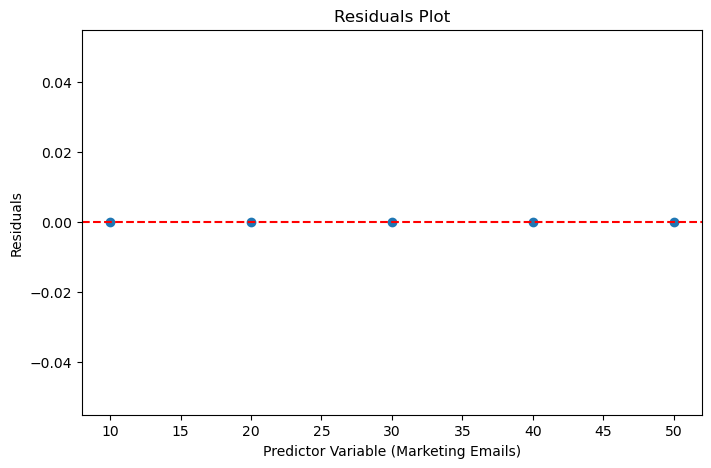

In [16]:
# Re-defining the example data
x = np.array([10, 20, 30, 40, 50])  # Predictor variable (e.g., number of marketing emails)
y = np.array([100, 200, 300, 400, 500])  # Target variable (e.g., sales in dollars)

# Model parameters (slope and intercept)
slope = 10.0
intercept = 0.0

# Predicted values using the linear model
y_pred = slope * x + intercept

# Calculate residuals (difference between actual and predicted values)
residuals = y - y_pred

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predictor Variable (Marketing Emails)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In this example, the ***x-axis*** represents the predictor variable (in this case, the number of marketing emails), and the ***y-axis*** shows the residuals, which are the differences between the actual sales values (y) and the predicted sales values ***(y_pred)*** from the model.
In this plot, a horizontal line at 0 (red dashed line) is drawn to indicate where residuals would be zero (i.e., where the model's predictions are exactly equal to the actual values). The scatter plot shows the residuals for each point:

A residual value above the line indicates that the model underestimated the actual value.
A residual value below the line indicates that the model overestimated the actual value.

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [17]:
sacramento_housing_df_type_dummies = pd.get_dummies(data = sacramento_housing_df, columns=['type'], dtype=int)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [18]:
sacramento_housing_df_type_dummies.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,0


In [19]:
sacramento_housing_df_type_dummies.drop(columns=['type_Unkown'], inplace=True)

In [20]:
sacramento_housing_df_type_dummies.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
features = ['sq__ft', 'type_Condo', 'type_Residential']
X = sacramento_housing_df_type_dummies[features]
y = sacramento_housing_df_type_dummies['price']

In [23]:
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In [24]:
predictions = model.predict(X)
predictions

array([212647.86010602, 230124.43093274, 210535.88780068, 213492.64902816,
       210588.68710832, 163284.54664756, 226798.07455182, 230652.42400907,
       153727.87196589, 229015.64547243, 216502.20956328, 236565.94646403,
       214495.8358732 , 222362.9327106 , 222468.53132587, 163918.13833917,
       213070.25456709, 146019.17305138, 199553.6318129 , 240103.50007548,
       227537.26485869, 238677.91876938, 233978.78038999, 253039.33044571,
       216079.81510221, 225953.28562969, 219353.37217549, 227590.06416633,
       241370.68345869, 234401.17485106, 158902.20411398, 229332.44131823,
       241370.68345869, 227431.66624343, 158902.20411398, 243377.05714876,
       225636.48978388, 246228.21976098, 229015.64547243, 144171.19728421,
       172894.02063687, 232236.40323808, 224263.70778541, 223577.31678617,
       252300.14013884, 227642.86347396, 251930.5449854 , 271730.28534799,
       255943.29236556, 246492.21629915, 231233.21639304, 252458.53806174,
       245753.02599228, 2

In [25]:
score = model.score(X, y)
score

0.1272657687543448

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

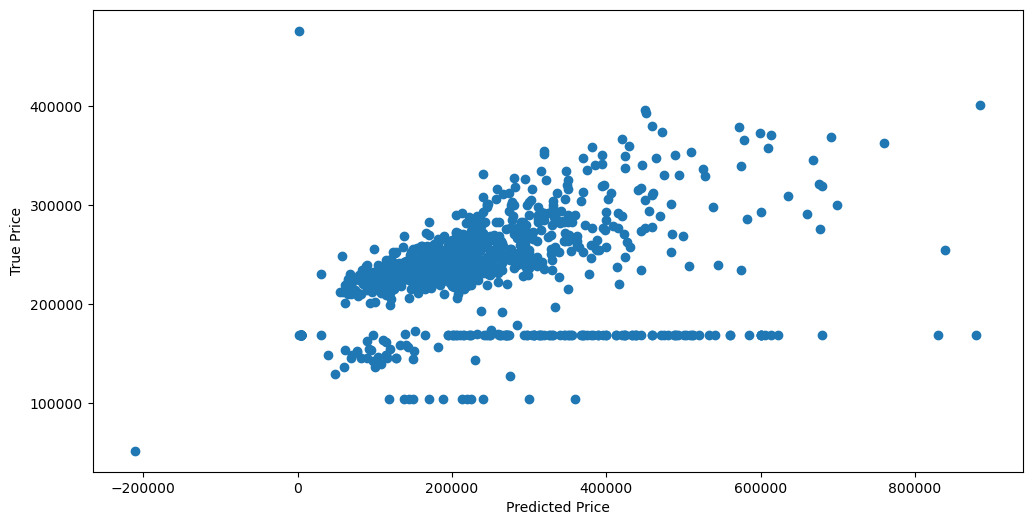

In [26]:
# Plot the model
plt.figure(figsize=(12,6))
plt.scatter(y, predictions)
plt.xlabel("Predicted Price")
plt.ylabel("True Price")
plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

Multiple Linear Regression (MLR) and Simple Linear Regression (SLR) share several key assumptions. Here are the five main assumptions for MLR, with indications of which are also applicable to SLR:

1. **Linear Relationship**:
   - **MLR**: There should be a linear relationship between the independent variables and the dependent variable.
   - **SLR**: There should be a linear relationship between the single independent variable and the dependent variable.
   - Both MLR and SLR require the relationship between the independent variable(s) and the dependent variable to be linear.
   
2. **Multivariate Normality**:
   - **MLR**: The residuals (errors) should be normally distributed. This is more about the residuals rather than the variables themselves.
   - **SLR**: The residuals should also be normally distributed.
   - Normal distribution of residuals is a key assumption in both MLR and SLR.
   


3. **No or Little Multicollinearity**:
   - **MLR**: In MLR, it is assumed that there is little or no multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated with each other.
   - **SLR**: This assumption does not apply to SLR as there is only one independent variable.
   - *Difference*: Multicollinearity is specific to MLR due to the presence of multiple independent variables.


4. **Homoscedasticity**:
   - **MLR**: The residuals should have constant variance at every level of the independent variables. This is known as homoscedasticity.
   - **SLR**: Homoscedasticity is also a key assumption in SLR.
   - Both MLR and SLR require the residuals to have constant variance (homoscedasticity).


5. **Independence of Errors**:
   - **MLR**: The residuals (or errors) of the model should be independent of each other.
   - **SLR**: The residuals should be independent in SLR as well.
   - Independence of errors is crucial in both MLR and SLR to ensure the validity of statistical inferences.

The assumptions of linear relationship, normal distribution of residuals, homoscedasticity, and independence of errors are common to both MLR and SLR. The assumption of no or little multicollinearity is specific to MLR due to the involvement of multiple independent variables.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

1. **Linear Relationship**: 
   - This assumption states that there should be a linear relationship between the independent variables (`sq__ft`, `type_Condo`, `type_Residential`) and the dependent variable (`price`).

2. **Homoscedasticity**:
   - Homoscedasticity refers to the assumption that the residuals (differences between predicted and actual values) should have constant variance across all levels of the independent variables. 
   

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [27]:
import statsmodels.api as sm

features = ['sq__ft', 'type_Condo', 'type_Residential']
X = sacramento_housing_df_type_dummies[features]
y = sacramento_housing_df_type_dummies['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X) # Ordinary Least Squared
model = model.fit()
predictions = model.predict(X)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              1090.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                   7.63e-312
Time:                        20:25:40   Log-Likelihood:                         -13002.
No. Observations:                 985   AIC:                                  2.601e+04
Df Residuals:                     982   BIC:                                  2.602e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sq__ft              57.3474      4.787     11.979      0.000      47.953      66.742
type_Condo        1.008e+05   1.81e+04      5.552      0.000    6.51e+04    1.36e+05
type_Residential  1.624e+05   7730.178     21.011      0.000    1.47e+05    1.78e+05
==============================================================================
Omnibus:                      277.984   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.492
Skew:                           1.447   Prob(JB):                    2.93e-163
Kurtosis:                       6.140   Cond. No.                     6.84e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This OLS (Ordinary Least Squares) Regression Results summary provides detailed statistical insights into the linear regression model fitted.

1. **Dependent Variable**: The model predicts the variable 'price'.

2. **Model Performance Metrics**:
   - **R-squared (uncentered)**: 0.769. This value indicates that approximately 76.9% of the variance in the dependent variable 'price' is explained by the model. 
   
3. **Model Parameters**:
   - **F-statistic**: 1090. This is very high, indicating the model is statistically significant.
   - **Prob (F-statistic)**: 7.63e-312, practically zero. This extremely low value suggests that the model is statistically significant, and the relationship between the independent variables and the dependent variable is not due to chance.

   The p-values for all coefficients are effectively zero, indicating these relationships are statistically significant.


### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [29]:
def r2_adj(r_squared, num_observations, num_predictors):
    
    return 1 - (1 - r_squared) * (num_observations - 1) / (num_observations - num_predictors - 1)

r_squared = 0.769  
num_observations = 985  
num_predictors = 3  

adjusted_r_squared = r2_adj(r_squared, num_observations, num_predictors)
print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.7682935779816514


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating the metrics
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 96061.39968177471
Mean Squared Error (MSE): 17082892860.429966
Root Mean Squared Error (RMSE): 130701.54115552719


1. **Mean Absolute Error (MAE) = 96,061.40**: 
   - This value means that, on average, the predictions of the model are off by approximately $96,061.40 from the actual housing prices. The lower the MAE, the better the model's predictions are in terms of absolute error. In the context of housing prices, an error of this magnitude can be considered substantial, depending on the price range of the properties in your dataset.

2. **Mean Squared Error (MSE) = 17,082,892,860.43**:
   - The MSE is significantly high, which indicates that there are considerable errors in the predictions. MSE is more sensitive to larger errors because it squares the differences between predicted and actual values. This high value suggests that there are instances where the model is making large errors in prediction.

3. **Root Mean Squared Error (RMSE) = 130,701.54**:
   - RMSE is the square root of the MSE, bringing the error metric back to the same unit as the dependent variable (price). An RMSE of $130,701.54 means that the standard deviation of the prediction errors is around this value. This metric also suggests a significant deviation of the predicted prices from the actual prices.


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [45]:
sacramento_housing_df_type_dummies.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


In [46]:
sacramento_housing_df_type_beds_dummies = pd.get_dummies(data = sacramento_housing_df_type_dummies, columns=['beds'], dtype=int)

sacramento_housing_df_type_beds_dummies.head()

,street,city,zip,state,baths,sq__ft,sale_date,price,latitude,longitude,...,type_Multi-Family,type_Residential,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,beds_6,beds_8
0,3526 HIGH ST,SACRAMENTO,95838,CA,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,...,0,1,0,0,1,0,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,...,0,1,0,0,0,1,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,...,0,1,0,0,1,0,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,...,0,1,0,0,1,0,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,...,0,1,0,0,1,0,0,0,0,0


In [90]:
sacramento_housing_df_type_beds_dummies[sacramento_housing_df_type_beds_dummies['beds_4'] == 1].value_counts().sum()

258

In [115]:
features = ['sq__ft', 'beds_1', 'beds_2', 'beds_3', 'beds_4', 'type_Condo', 
            'type_Residential', 'type_Multi-Family']

X = sacramento_housing_df_type_beds_dummies[features]
y = sacramento_housing_df_type_beds_dummies['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model_1 = sm.OLS(y, X) # Ordinary Least Squared
model_1 = model_1.fit()
predictions_1 = model_1.predict(X)

In [116]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              451.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                   8.10e-322
Time:                        20:45:00   Log-Likelihood:                         -12962.
No. Observations:                 985   AIC:                                  2.594e+04
Df Residuals:                     977   BIC:                                  2.598e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sq__ft               52.4826      5.118     10.255      0.000      42.439      62.526
beds_1             -1.59e+05   4.45e+04     -3.572      0.000   -2.46e+05   -7.17e+04
beds_2            -9.971e+04   1.51e+04     -6.625      0.000   -1.29e+05   -7.02e+04
beds_3             -7.52e+04   1.17e+04     -6.401      0.000   -9.83e+04   -5.21e+04
beds_4            -2.827e+04   1.32e+04     -2.138      0.033   -5.42e+04   -2322.891
type_Condo         1.959e+05   2.18e+04      8.970      0.000    1.53e+05    2.39e+05
type_Residential   2.212e+05   1.08e+04     20.513      0.000       2e+05    2.42e+05
type_Multi-Family  1.422e+05   3.68e+04      3.868      0.000    7.01e+04    2.14e+05
==============================================================================
Omnibus:                      225.855   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.877
Skew:                           1.195   Prob(JB):                    1.47e-125
Kurtosis:                       5.881   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
# Calculating the metrics
mae = mean_absolute_error(y, predictions_1)
mse = mean_squared_error(y, predictions_1)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 90835.3724721227
Mean Squared Error (MSE): 15752192834.854626
Root Mean Squared Error (RMSE): 125507.74013922259


### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

Based on thenew metrics (MAE, MSE, RMSE) after iteration, the model shows improvement in predictive accuracy with each iteration. However, the model bias is is still high.